In [30]:
import numpy as np
data = np.load('data/toy-data.npz')
print(data.files)

training_data = data['training_data']
training_labels = data["training_labels"]
test_data = data ["test_data"]
test_data

['training_data', 'training_labels', 'test_data']


array([], dtype=float64)

In [31]:
pip install scikit-learn scipy numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


b is 0.1471


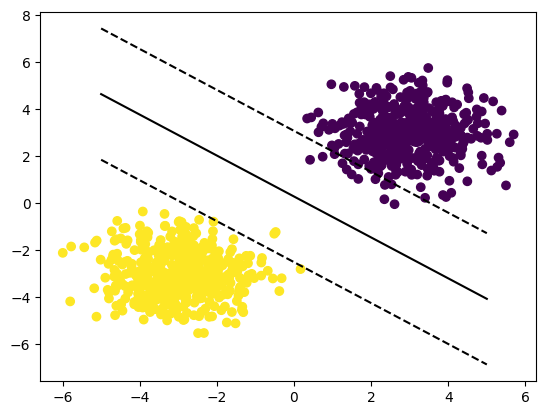

In [32]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC


w = np.array([-0.4528, -0.5190])
alpha = 0.1471


model = SVC(kernel='linear', C=1e5) 
model.fit(training_data, training_labels)


plt.scatter(training_data[:, 0], training_data[:, 1], c=training_labels)

b = alpha
print("b is", b)
x = np.linspace(-5, 5, 100)
y = -(w[0] * x + b) / w[1]
plt.plot(x, y, 'k')
# Plot the margins
## TODO

margin = 1 / np.linalg.norm(w)

y_margin_positive = -(w[0] * x + alpha - margin) / w[1]
y_margin_negative = -(w[0] * x + alpha + margin) / w[1]
plt.plot(x, y_margin_positive, 'k--')
plt.plot(x, y_margin_negative, 'k--')

In [33]:
# This file is in scripts/load.py
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
if __name__ == "__main__":
    for data_name in ["mnist", "spam", "toy"]:
        data = np.load(f"data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 40)
training_data (4171, 40)
training_labels (4171,)

loaded toy data!
test_data (0,)
training_data (1000, 2)
training_labels (1000,)


<font size="+2">Problem 3</font>

FOR MNIST RUN FROM HERE:

In [34]:
# (a) Data partitioning: Rarely will you receive “training” data and “validation” data; usually you
# will have to partition available labeled data yourself. In this question, you will shuffle and par-
# tition each of the datasets in the assignment1. Shuffling prior to splitting crucially ensures that
# all classes are represented in your partitions. For this question, please do not use any functions
# available in sklearn. For the MNIST dataset, write code that sets aside 10,000 training images
# as a validation set. For the spam dataset, write code that sets aside 20% of the training data as
# a validation set.

# MNIST
MNIST_data = np.load('data/mnist-data.npz')
print(MNIST_data.files)

['training_data', 'training_labels', 'test_data']


In [35]:
training_data_MNIST = MNIST_data['training_data']
training_labels_MNIST = MNIST_data["training_labels"]
test_data_MNIST = MNIST_data ["test_data"]
print(training_data_MNIST[0][0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  11 173 254 253 234 152  92  51  41   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  51 252 253 252 253 252 253 252 243 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  21 203 254 253 254 253 254 253 254 253
   82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20  50  50 112 151 213 252 253 252
  243  40   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  4

In [36]:
# make a validation set from training_data_MNIST
#print(training_data_MNIST)
np.random.seed(35)
sample_points = 10000
val_indices = np.random.choice(training_data_MNIST.shape[0], size=sample_points, replace=False)
validation_MNIST = training_data_MNIST[val_indices, :]
print(len(val_indices))
validation_labels_MNIST = training_labels_MNIST[val_indices]


remaining_indices = np.setdiff1d(np.arange(training_data_MNIST.shape[0]), val_indices)
remaining_training_data = training_data_MNIST[remaining_indices, :]
remaining_training_labels = training_labels_MNIST[remaining_indices]

shuffled_indices = np.random.permutation(len(remaining_training_data))
shuffled_training_data = remaining_training_data[shuffled_indices]
shuffled_training_labels = remaining_training_labels[shuffled_indices]

print(len(shuffled_training_data))

10000
50000


TO HERE

FOR SPAM RUN FROM HERE: 

In [47]:
# make validation set from spam

spam_data = np.load('data/spam-data.npz')
print(spam_data.files)

['training_data', 'training_labels', 'test_data']


In [48]:
training_data_spam = spam_data['training_data']
training_labels_spam = spam_data["training_labels"]
test_data_spam = spam_data ["test_data"]

print(len(training_data_spam))

twenty_percent = int(np.round(len(training_data_spam) * 0.2))
print(twenty_percent)



4171
834


In [ ]:


# Set the seed for random's random number generator.
# np.random.seed(35)
# val_indices = np.random.choice(training_data_spam.shape[0], size=twenty_percent, replace=False)
# validation_spam = training_data_spam[val_indices, :]
# print(validation_spam)
# validation_labels_spam = training_labels_spam[val_indices]


# remaining_indices = np.setdiff1d(np.arange(training_data_spam.shape[0]), val_indices)
# remaining_training_data = training_data_spam[remaining_indices, :]
# remaining_training_labels = training_labels_spam[remaining_indices]

# shuffled_indices = np.random.permutation(len(remaining_training_data))
# shuffled_data_spam = remaining_training_data[shuffled_indices]
# shuffled_labels_spam = remaining_training_labels[shuffled_indices]
np.random.seed(14)
# seed 10, 11, 12
# seed 14
shuffled_indices = np.random.permutation(len(training_data_spam))
shuffled_data_spam = training_data_spam[shuffled_indices]
shuffled_labels_spam = training_labels_spam[shuffled_indices]

twenty_percent = int(np.round(len(training_data_spam) * 0.2))
val_indices = np.random.choice(len(shuffled_data_spam), size=twenty_percent, replace=False)
validation_spam = shuffled_data_spam[val_indices, :]
validation_labels_spam = shuffled_labels_spam[val_indices]

remaining_indices = np.setdiff1d(np.arange(len(shuffled_data_spam)), val_indices)
remaining_training_data = shuffled_data_spam[remaining_indices, :]
remaining_training_labels = shuffled_labels_spam[remaining_indices]

# shuffled_indices = np.random.permutation(len(training_data_spam))
# shuffled_data_spam = training_data_spam[shuffled_indices]
# shuffled_labels_spam = training_labels_spam[shuffled_indices]

TO HERE

In [40]:
# (b) Evaluation metric: There are several ways to evaluate models. We will use classification
# accuracy, or the percent of examples classified correctly, as a measure of the classifier perfor-
# mance. Error rate, or one minus the accuracy, is another common metric. Write a function,
# taking as inputs the set of true labels y and the set of predicted labels ˆy, that computes the
# (unweighted) accuracy score s,



def evaluation_metric(true_labels, pred_labels):
    # s = (1/n) (number that is true)

    s = 0
    for i in range(len(true_labels)):
        if true_labels[i] == pred_labels[i]:
            s += 1
    accuracy = s / len(true_labels)
    return accuracy





<font size="+2">Problem 4</font>

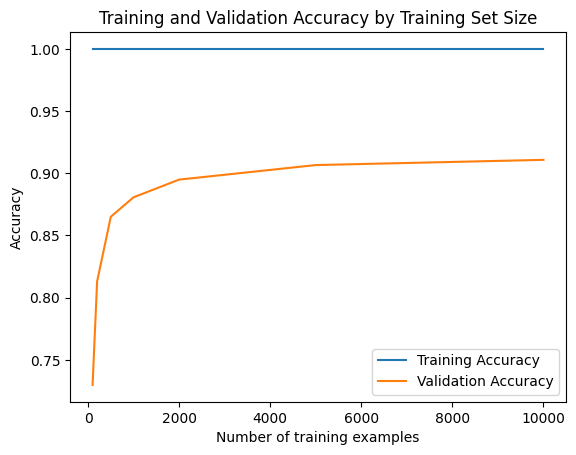

In [41]:
# (a) For the MNIST dataset, use raw pixels as features. Train your model with the following num-
# bers of training examples: 100, 200, 500, 1,000, 2,000, 5,000, 10,000. For the largest training
# set, you should expect validation accuracies between 70% and 90%. When you calculate the
# training accuracy, you only need to calculate on the subset of the data used to train the model,
# not necessarily the full training dataset.
training_set_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]

train_accuracies = []
validation_accuracies = []
for size in training_set_sizes:
    train_sample = shuffled_training_data[:size].reshape(size, 28*28)  # Flatten the images
    train_labels_sample = shuffled_training_labels[:size]

    svm = SVC(kernel='linear')
    svm.fit(train_sample, train_labels_sample)

    train_preds = svm.predict(train_sample)
    val_preds = svm.predict(validation_MNIST.reshape(len(validation_MNIST), -1))

    train_accuracy = evaluation_metric(train_labels_sample, train_preds)
    val_accuracy = evaluation_metric(validation_labels_MNIST, val_preds)
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(val_accuracy)
    

plt.plot(training_set_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_set_sizes, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Training Set Size')
plt.legend()
plt.show()

    

In [42]:
validation_accuracies

[0.7298, 0.8131, 0.865, 0.8807, 0.8949, 0.9066, 0.9108]

size is 100
size is 200
size is 500
size is 1000
size is 2000
size is 10000


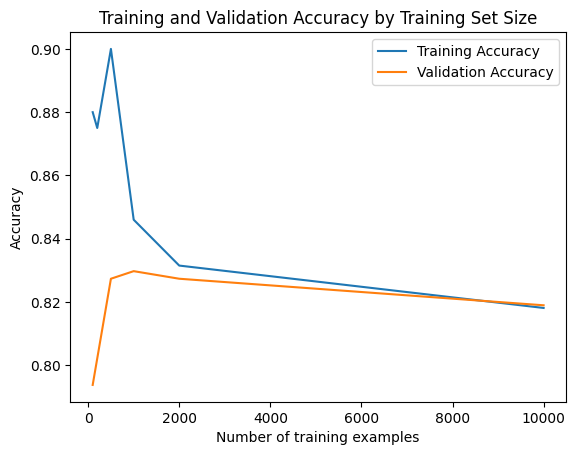

In [55]:
# (b) For the spam dataset, use the provided word frequencies as features. In other words, each
# document is represented by a vector, where the ith entry denotes the number of times word i (as
# specified in featurize.py) is found in that document. Train your model with the following
# numbers of training examples: 100, 200, 500, 1,000, 2,000, ALL. When you calculate the
# training accuracy, you only need to calculate on the subset of the data used to train the model,
# not necessarily the full training dataset.
# For the largest training set, you should expect validation accuracies between 70% and 90%

training_set_sizes = [100, 200, 500, 1000, 2000, 10000]

train_accuracies = []
validation_accuracies = []
for size in training_set_sizes:
    # print("size is", size)
    # train_sample = shuffled_training_data[:size]  # Flatten the images
    # train_labels_sample = shuffled_training_labels[:size]

    # svm = SVC(kernel='linear')
    # svm.fit(train_sample, train_labels_sample)

    # train_preds = svm.predict(train_sample)
    # val_preds = svm.predict(validation_spam)

    # train_accuracy = evaluation_metric(train_labels_sample, train_preds)
    # val_accuracy = evaluation_metric(validation_labels_spam, val_preds)
    # train_accuracies.append(train_accuracy)
    # validation_accuracies.append(val_accuracy)
    print("size is", size)
    train_sample = remaining_training_data[:size]  # Use only 'size' number of samples
    train_labels_sample = remaining_training_labels[:size]

    svm = SVC(kernel='linear')
    svm.fit(train_sample, train_labels_sample)

    train_preds = svm.predict(train_sample)
    val_preds = svm.predict(validation_spam)

    train_accuracy = evaluation_metric(train_labels_sample, train_preds)
    val_accuracy = evaluation_metric(validation_labels_spam, val_preds)
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(val_accuracy)
    

plt.plot(training_set_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_set_sizes, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Training Set Size')
plt.legend()
plt.show()

In [51]:
validation_accuracies

[0.7937649880095923,
 0.802158273381295,
 0.8273381294964028,
 0.829736211031175,
 0.8273381294964028,
 0.8189448441247003]

<font size="+2"> Problem 5 </font>

In [11]:
# In the previous problem, you learned parameters for a model that classifies the data. Many clas-
# sifiers also have hyperparameters that you can tune to influence the parameters. In this problem,
# we’ll determine good values for the regularization parameter C in the soft-margin SVM algorithm.
# The interpretation of this parameter, as well as the functioning of the soft-margin SVM will be
# covered in lecture. For now, consider C as a parameter of a black-box algorithm that we aim to
# optimize.
# When we are trying to choose a hyperparameter value, we train the model repeatedly with different
# hyperparameters. We select the hyperparameter that gives the model with the highest accuracy on
# the validation dataset. Before generating predictions for the test set, the model should be retrained
# using all the labeled data (including the validation data) and the previously-determined hyperpa-
# rameter.
# The use of automatic hyperparameter optimization libraries is prohibited for this part of the
# homework.
# Deliverable: For the MNIST dataset, find the best C value. In your report, list at least 8 C values
# you tried, the corresponding accuracies, and the best C value. You should try a geometric sequence
# of C values (not an arithmetic sequence). As in the previous problem, for performance reasons,
# you are required to train with at least 10,000 training examples. You can train on more if you like,
# but it is not required. Again, reference any code you used to perform a hyperparameter sweep in
# the code appendix.


from sklearn.svm import LinearSVC

training_set_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]

#C_values = [0.0000000000001, 0.5, 1, 2, 4, 8, 16, 32]
C_values = [0.000000001, 0.00005, 0.02, 1, 50, 100, 10000, 10000000]
print(C_values)
print("hi")
val_accuracies_C = []
best_C = None
best_C_val_accuracy = 0

for C_value in C_values:
    train_accuracies = []
    validation_accuracies = []
    for size in training_set_sizes:
        train_sample = shuffled_training_data[:size].reshape(size, -1) 
        train_labels_sample = shuffled_training_labels[:size]
        #print("C value is: ", C_value)

        svm = LinearSVC(C=C_value, max_iter=10000)
        svm.fit(train_sample, train_labels_sample)
    
        train_preds = svm.predict(train_sample)
        val_preds = svm.predict(validation_MNIST.reshape(len(validation_MNIST), -1))
    
        train_accuracy = evaluation_metric(train_labels_sample, train_preds)
        val_accuracy = evaluation_metric(validation_labels_MNIST, val_preds)
        
        train_accuracies.append(train_accuracy)
        validation_accuracies.append(val_accuracy)
        #print("validation_accuracy: ", val_accuracy)
        
    mean_val_accuracy = np.mean(validation_accuracies)
    print(validation_accuracies)
    val_accuracies_C.append((C_value, mean_val_accuracy))
    if mean_val_accuracy > best_C_val_accuracy:
        best_C_val_accuracy = mean_val_accuracy
        best_C = C_value
print("best C accuracy: ", best_C_val_accuracy)

print("best C: ", best_C)
print("done")



[1e-09, 5e-05, 0.02, 1, 50, 100, 10000, 10000000]
hi


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sk

[0.3268, 0.5678, 0.7158, 0.7398, 0.7965, 0.8173, 0.8363]


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sk

[0.7102, 0.7738, 0.8123, 0.8197, 0.8338, 0.8596, 0.8787]


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sk

[0.7096, 0.7738, 0.811, 0.8146, 0.8116, 0.8094, 0.8438]


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sk

[0.7096, 0.7738, 0.811, 0.8146, 0.8111, 0.8152, 0.8412]


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `

[0.7096, 0.7738, 0.811, 0.8146, 0.8116, 0.8193, 0.8412]


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed t

[0.7096, 0.7738, 0.811, 0.8146, 0.8104, 0.8205, 0.8474]


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed t

[0.7096, 0.7738, 0.811, 0.8146, 0.8124, 0.8194, 0.8475]


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed t

[0.7096, 0.7738, 0.811, 0.8146, 0.8128, 0.8164, 0.8499]
best C accuracy:  0.8125857142857144
best C:  5e-05
done


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print("hi")

In [ ]:
# vals:
# [0.3268, 0.5678, 0.7158, 0.7398, 0.7965, 0.8173, 0.8363]
# [0.7102, 0.7738, 0.8123, 0.8197, 0.8338, 0.8596, 0.8787]
# [0.7096, 0.7738, 0.811, 0.8146, 0.8127, 0.8171, 0.8384]
# [0.7096, 0.7738, 0.811, 0.8146, 0.8115, 0.8159, 0.841]
# [0.7096, 0.7738, 0.811, 0.8146, 0.8111, 0.8102, 0.8444]
# [0.7096, 0.7738, 0.811, 0.8146, 0.8116, 0.8193, 0.8412]
# [0.7096, 0.7738, 0.811, 0.8146, 0.8104, 0.8149, 0.8423]
# [0.7096, 0.7738, 0.811, 0.8146, 0.8124, 0.8194, 0.8475]
# best C accuracy:  0.8125857142857144
# best C:  5e-05
# done
# full set vals = 0.8363, 0.8787, 0.8384, 0.841, 0.8444, 0.8412, 0.9423, 0.8475

<font size="+2"> Problem 6 </font>

In [52]:
# For smaller datasets (e.g., the spam dataset), the validation set contains fewer examples, and our
# estimate of our accuracy might not be accurate—the estimate has high variance. A way to combat
# this is to use k-fold cross-validation.
# In k-fold cross-validation, the training data is shuffled and partitioned into k disjoint sets. Then the
# model is trained on k − 1 sets and validated on the kth set. This process is repeated k times with
# each set chosen as the validation set once. The cross-validation accuracy we report is the accuracy
# averaged over the k iterations.
# Use of automatic cross-validation libraries is prohibited for this part of the homework.
# Deliverable: For the spam dataset, use 5-fold cross-validation to find and report the best C value.
# In your report, list at least 8 C values you tried, the corresponding accuracies, and the best C value.
# Again, please include your code for cross validation or include a reference to its location in your
# code appendix.
# Hint: Effective cross-validation requires choosing from random partitions. This is best imple-
# mented by randomly shuffling your training examples and labels, then partitioning them by their
# indices.
from sklearn.svm import LinearSVC
C_values = C_values = [0.000000001, 0.00005, 0.02, 1, 50, 100, 10000, 10000000]
k = 5  
fold_size = len(shuffled_data_spam) // k
best_C = None
best_C_mean_val_accuracy = 0

for C_value in C_values:
    val_accuracies = []

    for fold in range(k):
        start_val = fold * fold_size
        end_val = start_val + fold_size
        val_data = shuffled_data_spam[start_val:end_val]
        val_labels = shuffled_labels_spam[start_val:end_val]
        train_data = np.concatenate((shuffled_data_spam[:start_val], shuffled_data_spam[end_val:]))
        train_labels = np.concatenate((shuffled_labels_spam[:start_val], shuffled_labels_spam[end_val:]))
        
        svm = LinearSVC(C=C_value, max_iter=10000)
        svm.fit(train_data, train_labels)
        val_preds = svm.predict(val_data)
        val_accuracy = evaluation_metric(val_labels, val_preds)
        val_accuracies.append(val_accuracy)

    mean_val_accuracy = np.mean(val_accuracies)
    if mean_val_accuracy > best_C_mean_val_accuracy:
        best_C_mean_val_accuracy = mean_val_accuracy
        best_C = C_value

    
    print("mean val acc: ", mean_val_accuracy)

print("best c: ", best_C)

/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sk

mean val acc:  0.7167865707434052
mean val acc:  0.7700239808153477


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(

mean val acc:  0.8141486810551559


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(

mean val acc:  0.830695443645084


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(

mean val acc:  0.8364508393285373


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(

mean val acc:  0.8357314148681055


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(

mean val acc:  0.7882494004796163


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(

mean val acc:  0.7877697841726619
best c:  50


/home/sima/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
# C: 1e-09, Mean Validation Accuracy: 0.7469265367316342
# C: 5e-05, Mean Validation Accuracy: 0.7580209895052474
# C: 0.02, Mean Validation Accuracy: 0.7985007496251874
# C: 1, Mean Validation Accuracy: 0.8053973013493254
# C: 50, Mean Validation Accuracy: 0.808695652173913
# C: 100, Mean Validation Accuracy: 0.8113943028485757
# C: 10000, Mean Validation Accuracy: 0.7325337331334333
# C: 10000000, Mean Validation Accuracy: 0.7697151424287856

# Best C: 100 with mean validation accuracy: 0.8113943028485757

In [9]:
print("hi")

hi


In [8]:
import pandas as pd
# Usage: results_to_csv(clf.predict(X_test))
shuffled_training_data_reshaped = shuffled_training_data.reshape(len(shuffled_training_data), -1)
validation_MNIST_reshaped = validation_MNIST.reshape(len(validation_MNIST), -1)

svm_model = SVC(C=0.00005)
svm_model.fit(shuffled_training_data_reshaped, shuffled_training_labels)

val_predictions = svm_model.predict(validation_MNIST_reshaped)
val_accuracy = np.mean(val_predictions == validation_labels_MNIST)
print("valu accuracy: ", val_accuracy)
print("done")




valu accuracy:  0.1121
done


In [12]:
full_training_data = np.concatenate((shuffled_training_data_reshaped, validation_MNIST_reshaped))
full_training_labels = np.concatenate((shuffled_training_labels, validation_labels_MNIST))
svm_model.fit(full_training_data, full_training_labels)  
test_data_MNIST_reshaped = test_data_MNIST.reshape(test_data_MNIST.shape[0], -1)  
test_predictions = svm_model.predict(test_data_MNIST_reshaped)

print("done")


done


In [15]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')

reshaped_test_data_MNIST = test_data_MNIST.reshape(10000, -1)
print(test_data_MNIST.shape[0])

results_to_csv(svm_model.predict(reshaped_test_data_MNIST))
print(test_data_MNIST.shape[0])

10000
10000


In [16]:
print(len(reshaped_test_data_MNIST))

10000


In [14]:
best_C_value = 100  

svm_model = SVC(kernel='linear', C=best_C_value)

full_training_data = np.concatenate((remaining_training_data, validation_spam))
full_training_labels = np.concatenate((remaining_training_labels, validation_labels_spam))
print("done")

done


In [15]:
svm_model.fit(full_training_data, full_training_labels)

test_predictions = svm_model.predict(test_data_spam)
print("done")

done


In [17]:
import pandas as pd
def results_to_csv_spam(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1
    df.to_csv('spam_submission.csv', index_label='Id')

results_to_csv_spam(test_predictions)
print("done")

done


In [ ]:
# import pandas as pd
# # Usage: results_to_csv(clf.predict(X_test))
# def results_to_csv(y_test):
#     y_test = y_test.astype(int)
#     df = pd.DataFrame({'Category': y_test})
#     df.index += 1 # Ensures that the index starts at 1
#     df.to_csv('submission_spam.csv', index_label='Id')

# reshaped_test_data_spam = test_data_spam
# print(test_data_spam.shape[0])

# results_to_csv(svm.predict(reshaped_test_data_spam))
# print(test_data_spam.shape[0])